In [332]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [333]:
#Reading the dataset
housing_df = pd.read_csv("train.csv")

In [334]:
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [335]:
housing_df.drop("Id", axis = 1, inplace = True)
housing_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [336]:
#Checking for duplicate values
sum(housing_df.duplicated())

0

In [337]:
housing_df.shape

(1460, 80)

In [338]:
#Missing Value treatment
#Function to check null values
def null_summary(data):
    df = pd.DataFrame([data.isnull().sum(),
              round(100*(data.isnull().sum()/len(data.index)), 2)]
            ).T.rename(columns={0:'null_count',1:'null_percentage'}).\
sort_values(by='null_percentage',ascending=False)
    return df

In [339]:
null_summary(housing_df)

,null_count,null_percentage
PoolQC,1453.0,99.52
MiscFeature,1406.0,96.30
Alley,1369.0,93.77
Fence,1179.0,80.75
FireplaceQu,690.0,47.26
LotFrontage,259.0,17.74
GarageYrBlt,81.0,5.55
GarageCond,81.0,5.55
GarageType,81.0,5.55
GarageFinish,81.0,5.55


In [340]:
#Missing value treatment


# PoolQC: Pool quality | NA: No Pool
# FireplaceQu: Fireplace quality | NA: No Fireplace
# BsmtExposure: Refers to walkout or garden level walls | NA: No Basement
# BsmtFinType1: Rating of basement finished area | NA: No Basement
# BsmtFinType2: Rating of basement finished area (if multiple types) | NA: No Basement
# BsmtCond: Evaluates the general condition of the basement | NA: No Basement
# BsmtQual: Evaluates the height of the basement | NA: No Basement
# Fence: Fence quality | NA	No Fence
# GarageType: Garage location | NA: No Garage
# GarageFinish: Interior finish of the garage | NA: No Garage
# GarageQual: Garage quality | NA: No Garage
# GarageCond: Garage condition | NA: No Garage
# MasVnrType: Masonry veneer type | None: None
# Electrical: Electrical system

for col in ('PoolQC','MiscFeature','Alley','FireplaceQu','BsmtExposure','BsmtFinType1', 'BsmtFinType2','BsmtCond', 
            'BsmtQual','Fence','GarageType','GarageFinish','GarageQual','GarageCond','MasVnrType',
            'Electrical'):
    housing_df[col] = housing_df[col].fillna("None")

In [341]:
# GarageYrBlt: Year garage was built
# GarageArea: Size of garage in square feet
# GarageCars: Size of garage in car capacity
# MasVnrArea: Masonry veneer area in square feet
# BsmtFinSF1: Type 1 finished square feet
# BsmtFinSF2: Type 2 finished square feet
# BsmtUnfSF: Unfinished square feet of basement area
# TotalBsmtSF: Total square feet of basement area
# BsmtFullBath: Basement full bathrooms
# BsmtHalfBath: Basement half bathrooms
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
            'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    housing_df[col] = housing_df[col].fillna(0)

In [342]:
#Replace missing values of LotFrontage with Median
housing_df.loc[:,'LotFrontage'] = housing_df.loc[:, 'LotFrontage'].fillna(housing_df['LotFrontage'].median())

In [343]:
housing_df["Functional"] = housing_df["Functional"].fillna("Typ")

In [344]:
null_summary(housing_df)

,null_count,null_percentage
MSSubClass,0.0,0.0
MSZoning,0.0,0.0
GarageYrBlt,0.0,0.0
GarageType,0.0,0.0
FireplaceQu,0.0,0.0
Fireplaces,0.0,0.0
Functional,0.0,0.0
TotRmsAbvGrd,0.0,0.0
KitchenQual,0.0,0.0
KitchenAbvGr,0.0,0.0


In [345]:
#New variable creation TotalSF i.e combination of TotalBsmtSF, 1stFlrSF, 2ndFlrSF
housing_df['TotalSF'] = housing_df['TotalBsmtSF'] + housing_df['1stFlrSF'] + housing_df['2ndFlrSF']

In [346]:
housing_df['MSSubClass'] = housing_df['MSSubClass'].astype(str)
housing_df['OverallCond'] = housing_df['OverallCond'].astype(str)
housing_df['YrSold'] = housing_df['YrSold'].astype(str)
housing_df['MoSold'] = housing_df['MoSold'].astype(str)

In [347]:
#Checking Categorical variables
housing_df.select_dtypes(include=['object']).columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [348]:
#Checking numerical variables
housing_df.select_dtypes(include=['int64','float64']).columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'TotalSF'],
      dtype='object')

In [349]:
Categorical_Count = len(housing_df.select_dtypes(include=['object']).columns)
Numerical_Count = len(housing_df.select_dtypes(include=['int64','float64']).columns)
print(Categorical_Count)
print(Numerical_Count)

47
34


In [350]:
housing_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

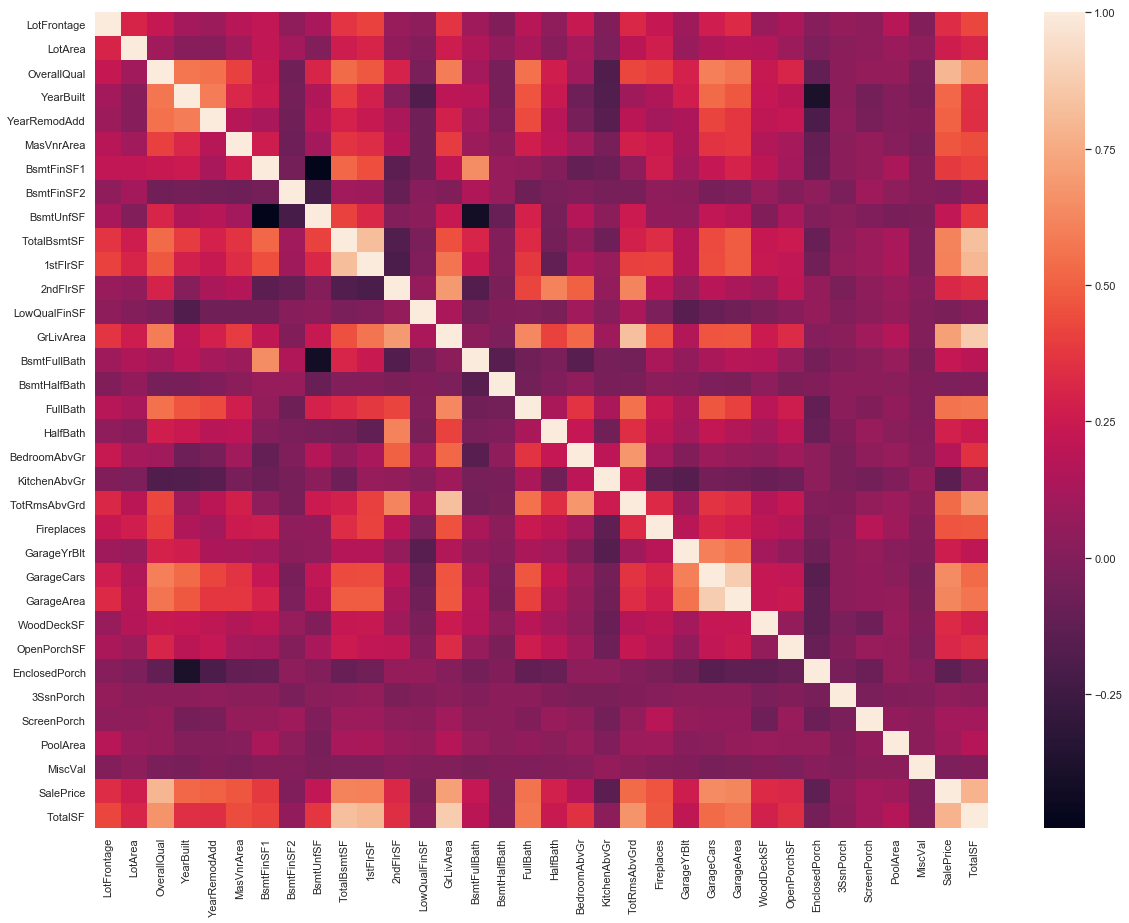

In [351]:
#Corellation Metrix
housing_df_Corr = housing_df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(housing_df_Corr, vmax=1.0)

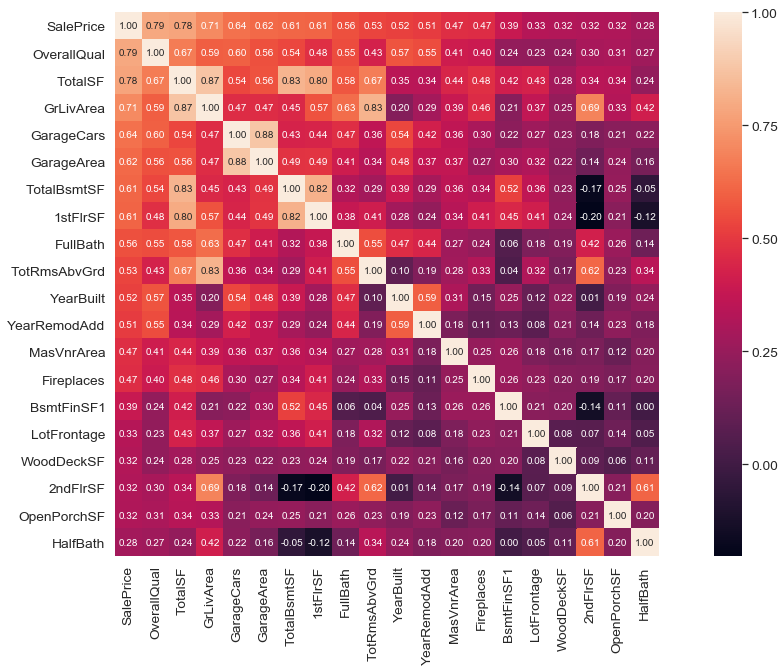

In [352]:
column = housing_df_Corr.nlargest(20, 'SalePrice')['SalePrice'].index
p = np.corrcoef(housing_df[column].values.T)
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.25)
q = sns.heatmap(p, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=column.values,
                 xticklabels=column.values)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

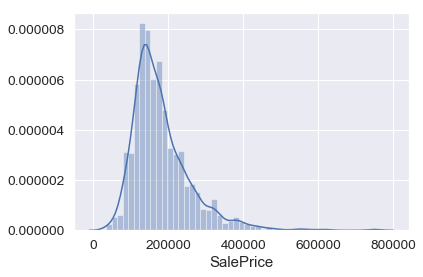

In [354]:
#checking for SalesPrice
sns.distplot(housing_df['SalePrice'])
plt.show()

<Figure size 2880x2160 with 0 Axes>

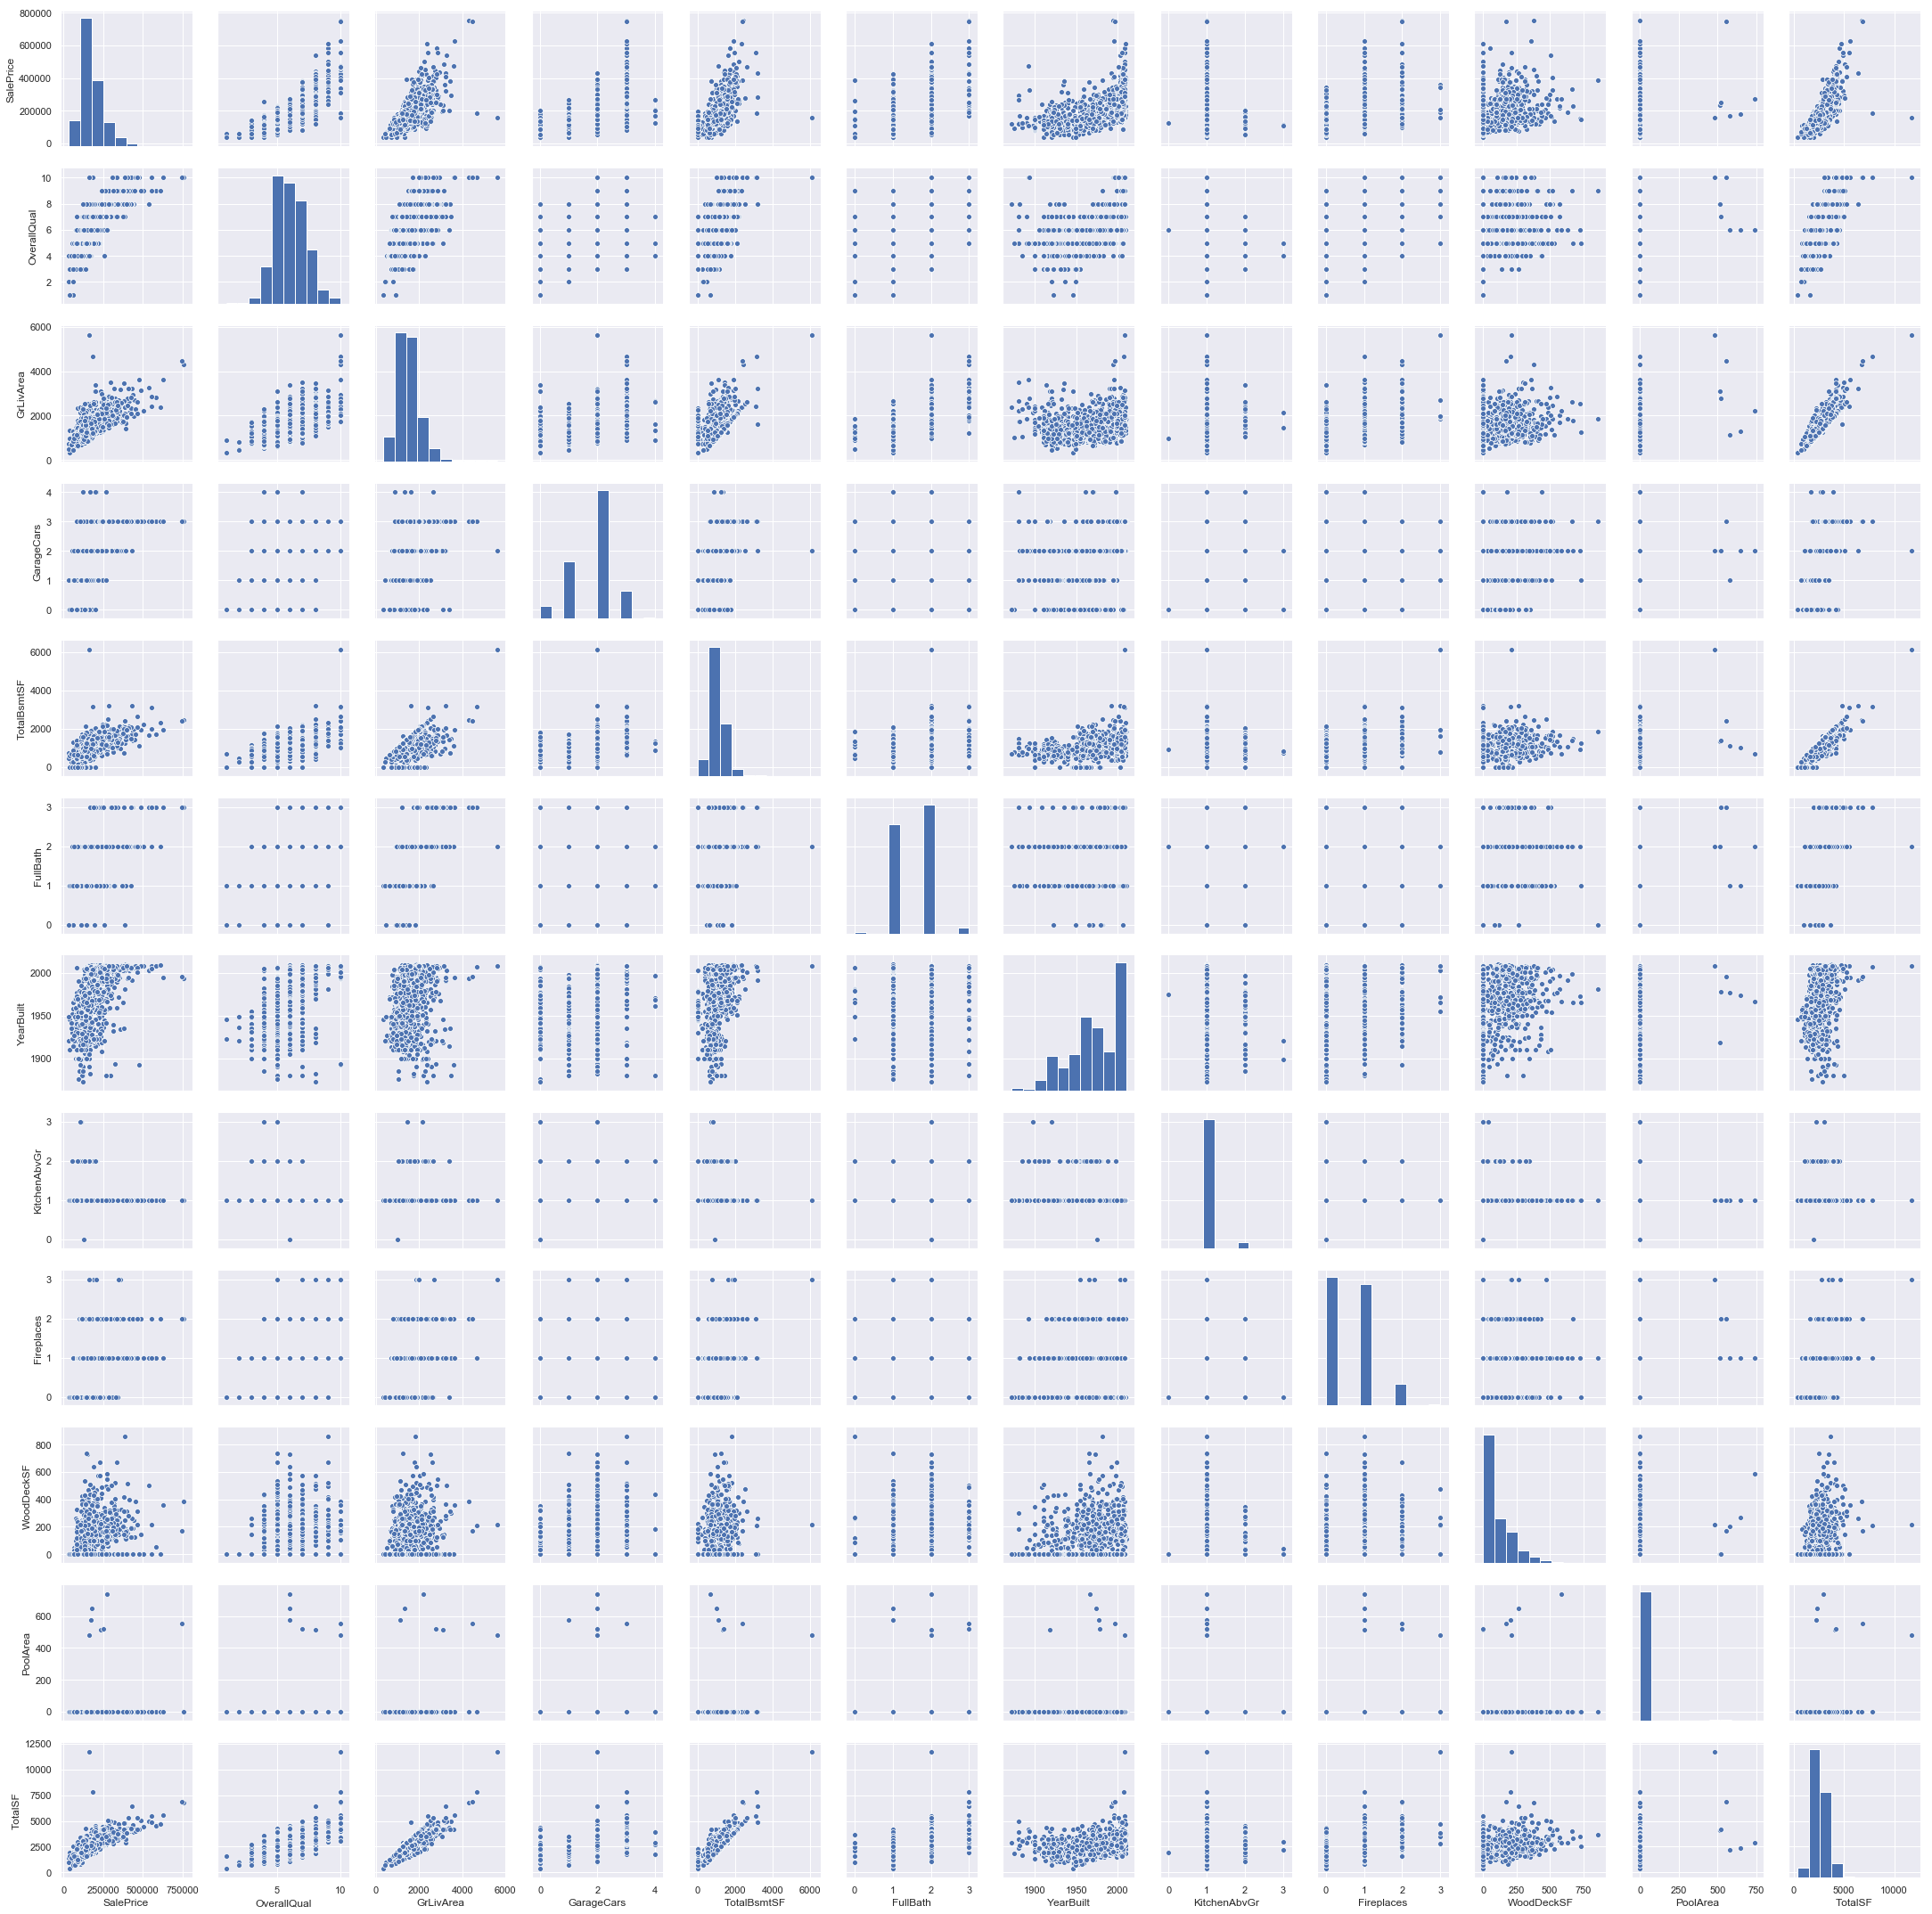

In [365]:
sns.set()
plt.figure(figsize=(40, 30))
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt',
        'KitchenAbvGr','Fireplaces','WoodDeckSF','PoolArea','TotalSF']
sns.pairplot(housing_df[cols], size = 2.5)
plt.show();

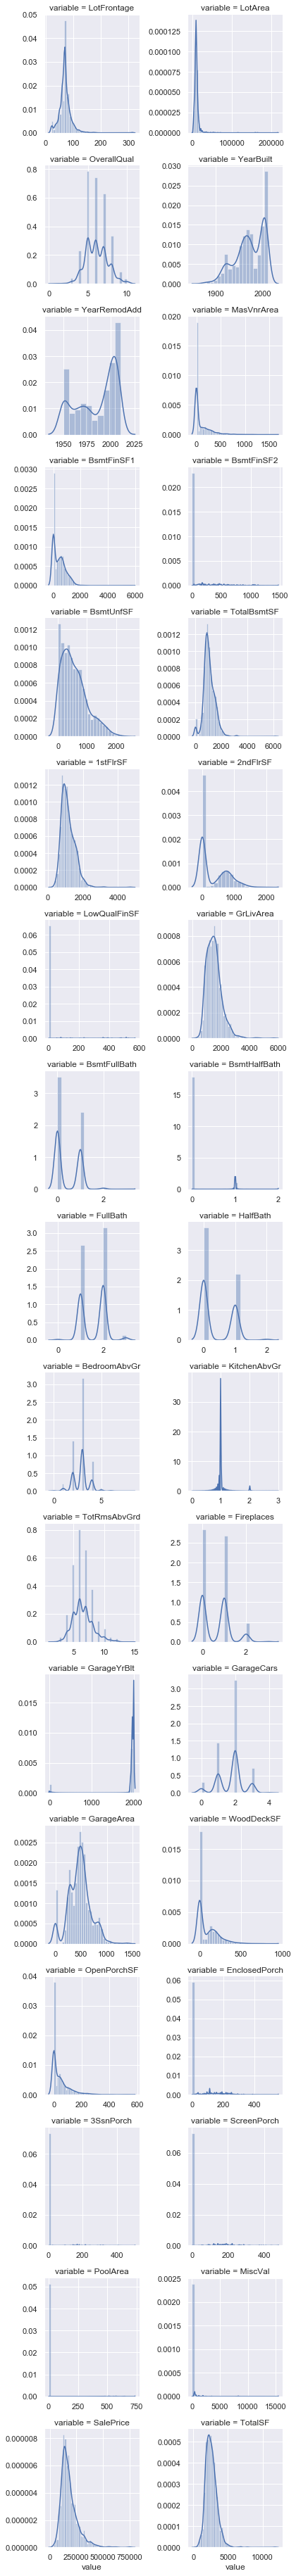

In [366]:
#EDA numerical Variables
housing_df_num = [i for i in housing_df.columns if housing_df.dtypes[i] != 'object']

#using pd.melt to unpivots a dataFrame from wide format to long format.
i = pd.melt(housing_df, value_vars=housing_df_num)
#Using sns.FacetGrid to plot multi-plot grid for plotting conditional relationships
g = sns.FacetGrid(i, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

In [367]:
#New Df of Numerical Data
housing_df_numeric = housing_df.select_dtypes(include=['float64', 'int64'])
housing_df_numeric.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,TotalSF
0,65.0,8450,7,2003,2003,196.0,706,0,150,856,...,548,0,61,0,0,0,0,0,208500,2566
1,80.0,9600,6,1976,1976,0.0,978,0,284,1262,...,460,298,0,0,0,0,0,0,181500,2524
2,68.0,11250,7,2001,2002,162.0,486,0,434,920,...,608,0,42,0,0,0,0,0,223500,2706
3,60.0,9550,7,1915,1970,0.0,216,0,540,756,...,642,0,35,272,0,0,0,0,140000,2473
4,84.0,14260,8,2000,2000,350.0,655,0,490,1145,...,836,192,84,0,0,0,0,0,250000,3343


In [368]:
# Dropping OverallQual, YearBuilt, YearRemodAdd as they have a discreate values
housing_df_numeric = housing_df_numeric.drop(['OverallQual','YearBuilt','YearRemodAdd'], axis=1)
housing_df_numeric.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,TotalSF
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,548,0,61,0,0,0,0,0,208500,2566
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,460,298,0,0,0,0,0,0,181500,2524
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,608,0,42,0,0,0,0,0,223500,2706
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,642,0,35,272,0,0,0,0,140000,2473
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,836,192,84,0,0,0,0,0,250000,3343


In [369]:
#Correlation matrix of Numerical variables
cor_mat = housing_df_numeric.corr()
cor_mat

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,TotalSF
LotFrontage,1.000000,0.304522,0.178469,0.214367,0.042463,0.124098,0.363472,0.413773,0.072388,0.037469,...,0.323511,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.334771,0.427175
LotArea,0.304522,1.000000,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,...,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843,0.307234
MasVnrArea,0.178469,0.103321,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,...,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,0.472614,0.444454
BsmtFinSF1,0.214367,0.214103,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,...,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420,0.415843
BsmtFinSF2,0.042463,0.111170,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,...,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.011378,0.048916
BsmtUnfSF,0.124098,-0.002618,0.113862,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,...,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.214479,0.373733
TotalBsmtSF,0.363472,0.260833,0.360067,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,...,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.613581,0.826742
1stFlrSF,0.413773,0.299475,0.339850,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,...,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.605852,0.800350
2ndFlrSF,0.072388,0.050986,0.173800,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,0.063353,...,0.138347,0.092165,0.208026,0.061989,-0.024358,0.040606,0.081487,0.016197,0.319334,0.342733
LowQualFinSF,0.037469,0.004779,-0.068628,-0.064503,0.014807,0.028167,-0.033245,-0.014241,0.063353,1.000000,...,-0.067601,-0.025444,0.018251,0.061081,-0.004296,0.026799,0.062157,-0.003793,-0.025606,0.009207


In [370]:
# split into X and y
y = housing_df["SalePrice"].values

In [371]:
# Label Encodding

from sklearn.preprocessing import LabelEncoder
columns = ['PoolQC','MiscFeature','Alley','LandContour',  'MSZoning','MasVnrType',  'ExterQual',  'ExterCond',
      'BsmtQual',  'BsmtCond',  'BsmtExposure','Foundation', 'Heating', 'Electrical', 'Functional',
      'BsmtFinType1',  'BsmtFinType2', 'HeatingQC','GarageType', 'GarageCond', 'Fence', 'SaleType',
      'CentralAir',  'KitchenQual',  'FireplaceQu',
      'GarageFinish',  'GarageQual',  'GarageCond','SaleCondition',
      'PavedDrive','Utilities','Street','LotShape','LotConfig', 'LandSlope', 'Neighborhood',
          'Condition1', 'Condition2', 'BldgType', 'HouseStyle','RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd']
for col in columns:
    lable_encode = LabelEncoder() 
    lable_encode.fit(list(housing_df[col].values)) 
    housing_df[col] = lable_encode.transform(list(housing_df[col].values))

In [372]:
# convert into dummies
housing_df_dummies = pd.get_dummies(housing_df, drop_first=True)
housing_df_dummies.head()

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,3,65.0,8450,1,1,3,3,0,4,0,...,0,0,0,0,0,0,0,1,0,0
1,3,80.0,9600,1,1,3,3,0,2,0,...,0,1,0,0,0,0,1,0,0,0
2,3,68.0,11250,1,1,0,3,0,4,0,...,0,0,0,0,0,1,0,1,0,0
3,3,60.0,9550,1,1,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,84.0,14260,1,1,0,3,0,2,0,...,0,0,0,0,0,0,0,1,0,0


In [373]:
# Merge Dataframe and Dummy variables
X = pd.concat([housing_df, housing_df_dummies], axis=1)

In [374]:
# scaling the features
from sklearn.preprocessing import scale

Scale_cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = Scale_cols
X.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       ...
       'MoSold_4', 'MoSold_5', 'MoSold_6', 'MoSold_7', 'MoSold_8', 'MoSold_9',
       'YrSold_2007', 'YrSold_2008', 'YrSold_2009', 'YrSold_2010'],
      dtype='object', length=195)

In [375]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## Ridge Regression

In [376]:
#Model Building
#Ridge Regression
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    1.5s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [377]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011986,0.002530,0.001598,0.001957,0.0001,{'alpha': 0.0001},-0.011018,-0.014053,-0.011625,-0.009033,...,-0.011218,0.001658,1,-0.009000,-0.009469,-0.009585,-0.008700,-0.009051,-0.009161,0.000324
1,0.008786,0.001598,0.000799,0.001598,0.001,{'alpha': 0.001},-0.110179,-0.140525,-0.116247,-0.090320,...,-0.112174,0.016577,2,-0.090004,-0.094687,-0.095845,-0.086996,-0.090506,-0.091607,0.003240
2,0.009588,0.001957,0.000798,0.001597,0.01,{'alpha': 0.01},-1.101608,-1.405156,-1.162371,-0.903122,...,-1.121629,0.165768,3,-0.899929,-0.946808,-0.958363,-0.869893,-0.904987,-0.915996,0.032401
3,0.011186,0.001599,0.000799,0.001598,0.05,{'alpha': 0.05},-5.504101,-7.023729,-5.809615,-4.513924,...,-5.605787,0.828763,4,-4.497282,-4.732675,-4.789874,-4.347953,-4.523399,-4.578236,0.162008
4,0.011186,0.002988,0.000000,0.000000,0.1,{'alpha': 0.1},-10.998381,-14.042329,-11.613632,-9.023636,...,-11.205689,1.657329,5,-8.988683,-9.461940,-9.574896,-8.692130,-9.042961,-9.152122,0.324020


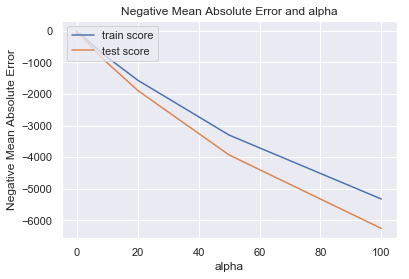

In [378]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [379]:
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.81321105e+02, -4.46960989e+01, -9.20832702e+01,  1.06589026e+02,
        9.75827242e+01,  1.35725131e+01, -1.65617025e+01,  9.32562458e+01,
       -4.41880763e+01,  1.60212254e+01,  9.30727047e+01,  9.27971680e+01,
        1.12418863e+00, -1.01948193e+02, -1.29069977e+02, -1.48033160e+02,
        5.34843071e+02,  3.29846779e+02,  2.02720294e+02,  4.02148328e+01,
        2.28895099e+01,  1.07754475e+02, -7.90082794e+00, -7.17942099e+01,
        3.61089405e+01,  2.30841876e+02, -1.84124757e+02,  2.90686234e+01,
        5.19310788e+01, -2.08115986e+02,  1.80861430e+01, -1.22465824e+02,
       -6.50511331e+01,  4.50785161e+01,  4.55763127e+01,  6.59257964e+01,
       -3.57234352e+01,  3.51268158e+01, -1.48293730e+00, -2.49938822e+01,
       -1.55358951e+01, -1.75324116e+01,  1.87321380e+02,  2.81172973e+02,
       -7.33759064e+01,  3.64596644e+02,  1.33909769e+02, -1.72342728e+01,
        6.15494576e+01,  3.00931568e+01, -7.16498725e+01, -1.80513623e+02,
       -2.43051495e+02,  

In [380]:
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 0) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 180846.0),
 ('MSSubClass', -181.0),
 ('MSZoning', -45.0),
 ('LotFrontage', -92.0),
 ('LotArea', 107.0),
 ('Street', 98.0),
 ('Alley', 14.0),
 ('LotShape', -17.0),
 ('LandContour', 93.0),
 ('Utilities', -44.0),
 ('LotConfig', 16.0),
 ('LandSlope', 93.0),
 ('Neighborhood', 93.0),
 ('Condition1', 1.0),
 ('Condition2', -102.0),
 ('BldgType', -129.0),
 ('HouseStyle', -148.0),
 ('OverallQual', 535.0),
 ('OverallCond', 330.0),
 ('YearBuilt', 203.0),
 ('YearRemodAdd', 40.0),
 ('RoofStyle', 23.0),
 ('RoofMatl', 108.0),
 ('Exterior1st', -8.0),
 ('Exterior2nd', -72.0),
 ('MasVnrType', 36.0),
 ('MasVnrArea', 231.0),
 ('ExterQual', -184.0),
 ('ExterCond', 29.0),
 ('Foundation', 52.0),
 ('BsmtQual', -208.0),
 ('BsmtCond', 18.0),
 ('BsmtExposure', -122.0),
 ('BsmtFinType1', -65.0),
 ('BsmtFinSF1', 45.0),
 ('BsmtFinType2', 46.0),
 ('BsmtFinSF2', 66.0),
 ('BsmtUnfSF', -36.0),
 ('TotalBsmtSF', 35.0),
 ('Heating', -1.0),
 ('HeatingQC', -25.0),
 ('CentralAir', -16.0),
 ('Electrical', -18.0),

## Lasso Regression

In [381]:
#Lasso

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    9.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [382]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.033555,0.006964,0.000000,0.000000,0.0001,{'alpha': 0.0001},-25.901059,-32.532898,-26.355074,-32.617644,...,-28.208645,3.678577,24,-21.084216,-23.102824,-24.635909,-23.882426,-22.478495,-23.036774,1.216625
1,0.031957,0.003573,0.000000,0.000000,0.001,{'alpha': 0.001},-25.896666,-32.530524,-26.355059,-32.608630,...,-28.206562,3.675080,23,-21.082246,-23.101291,-24.634670,-23.883697,-22.479217,-23.036224,1.217026
2,0.030359,0.004074,0.000000,0.000000,0.01,{'alpha': 0.01},-25.331301,-32.042387,-26.355159,-32.516275,...,-27.897536,3.714661,22,-20.636096,-22.756051,-24.622484,-23.895416,-22.054371,-22.792884,1.397248
3,0.029560,0.004074,0.001598,0.001957,0.05,{'alpha': 0.05},-24.628760,-31.034166,-25.552542,-31.301125,...,-27.109699,3.407402,21,-20.154888,-22.050635,-23.790427,-23.208114,-21.664396,-22.173692,1.267593
4,0.032756,0.006392,0.000000,0.000000,0.1,{'alpha': 0.1},-23.420002,-30.043382,-24.833997,-29.999687,...,-26.154704,3.241753,20,-19.291205,-21.369576,-22.989345,-22.556319,-20.910608,-21.423411,1.307501


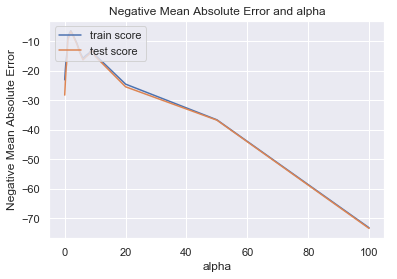

In [383]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [384]:
alpha =10

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [385]:
lasso.coef_

array([-0.00000000e+00, -0.00000000e+00,  5.29274514e+03,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        2.06695061e+04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  4.12310704e+03, -0.00000000e+00,  1.88434015e+02,
        8.47533411e+02,  1.33754397e+04, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  6.69596733e+03,  7.49380712e+03,
       -1.08979715e+02,  5.70554336e+03,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -4.43417681e+00,  

In [386]:
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 0) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 180921.0),
 ('MSSubClass', -0.0),
 ('MSZoning', -0.0),
 ('LotFrontage', 5293.0),
 ('LotArea', 0.0),
 ('Street', -0.0),
 ('Alley', 0.0),
 ('LotShape', -0.0),
 ('LandContour', 0.0),
 ('Utilities', -0.0),
 ('LotConfig', -0.0),
 ('LandSlope', 0.0),
 ('Neighborhood', 0.0),
 ('Condition1', 0.0),
 ('Condition2', -0.0),
 ('BldgType', -0.0),
 ('HouseStyle', 0.0),
 ('OverallQual', 20670.0),
 ('OverallCond', 0.0),
 ('YearBuilt', 0.0),
 ('YearRemodAdd', 0.0),
 ('RoofStyle', 0.0),
 ('RoofMatl', 0.0),
 ('Exterior1st', 0.0),
 ('Exterior2nd', 0.0),
 ('MasVnrType', -0.0),
 ('MasVnrArea', 0.0),
 ('ExterQual', -0.0),
 ('ExterCond', 0.0),
 ('Foundation', 0.0),
 ('BsmtQual', -0.0),
 ('BsmtCond', 0.0),
 ('BsmtExposure', -0.0),
 ('BsmtFinType1', -0.0),
 ('BsmtFinSF1', 4123.0),
 ('BsmtFinType2', -0.0),
 ('BsmtFinSF2', 188.0),
 ('BsmtUnfSF', 848.0),
 ('TotalBsmtSF', 13375.0),
 ('Heating', -0.0),
 ('HeatingQC', -0.0),
 ('CentralAir', 0.0),
 ('Electrical', 0.0),
 ('1stFlrSF', 6696.0),
 ('2ndFlrSF',